## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combined_data.head()

In D:\Users\mcbie\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\mcbie\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\mcbie\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\mcbie\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\mcbie\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
print(duplicate_row["Mouse ID"])

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="first",inplace=False,ignore_index=False)
#Capture a version of clean data for later use
clean_data_copy = clean_data
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_data["Mouse ID"].nunique()
total_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_vol_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_vol_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_vol_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_std = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_vol_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_statistics_indv_df = pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean,"Median Tumor Volume": tumor_vol_median,"Tumor Volume Variance": tumor_vol_variance,"Tumor Volume STD": tumor_vol_std,"Tumor Volume SEM": tumor_vol_sem})
summary_statistics_indv_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_table_one_function = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_table_one_function

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

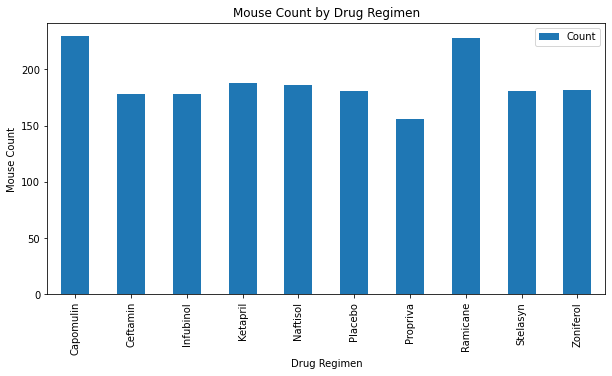

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count = clean_data.groupby("Drug Regimen")["Mouse ID"].count()
# Create dataframe to be charted
mice_count_df = pd.DataFrame({"Count":mice_count})
# Create plot using pandas
mice_count_df.plot(kind="bar",figsize=(10,5))
# Add chart title and remove superfluous legend
plt.title("Mouse Count by Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

In [10]:
# Reset index
mice_count_df = mice_count_df.reset_index(drop=False)
mice_count_df

,Drug Regimen,Count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


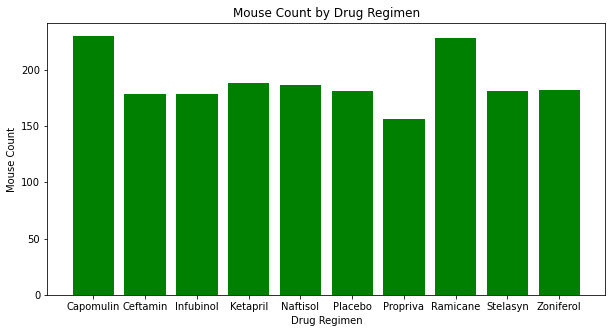

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Set axes
x_axis = mice_count_df["Drug Regimen"].tolist()
y_axis = mice_count_df["Count"].tolist()
# Set larger figure size
plt.figure(figsize=(10,5))
# Plot data
plt.bar(x_axis,y_axis,color="g")
# Add plot title and labels
plt.title("Mouse Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.show()

Text(0.5, 1.0, 'Mice Gender Breakdown')

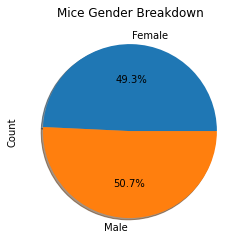

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_count = clean_data.groupby("Sex")["Mouse ID"].count()
# Create dataframe to be charted
mice_gender_count_df = pd.DataFrame({"Count":mice_gender_count})
# Create plot using pandas without legend
plot = mice_gender_count_df.plot.pie(y="Count",autopct="%1.1f%%",legend=False,shadow=True)
plt.title("Mice Gender Breakdown")

In [13]:
# Reset index
mice_gender_count_df = mice_gender_count_df.reset_index(drop=False)
mice_gender_count_df

,Sex,Count
0,Female,930
1,Male,958


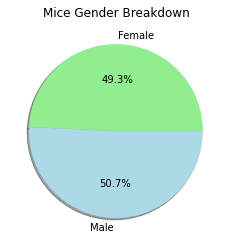

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Reset index
gender_count = mice_gender_count_df["Count"].to_list()
labels = mice_gender_count_df["Sex"].to_list()
colors = ["lightgreen","lightblue"]
plt.pie(gender_count,labels=labels,colors=colors,autopct="%1.1f%%",shadow=True)
# Add chart title
plt.title("Mice Gender Breakdown")
plt.show()

In [15]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") | (clean_data["Drug Regimen"] == "Ramicane") | (clean_data["Drug Regimen"] == "Infubinol") | (clean_data["Drug Regimen"] == "Ceftamin")]
clean_data
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby(["Mouse ID",])["Timepoint"].max()
max_timepoint_df = pd.DataFrame({"Max Timepoint":max_timepoint}).reset_index(drop=False)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data = pd.merge(clean_data,max_timepoint_df,on="Mouse ID",how="outer")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,45
810,z581,Infubinol,Female,24,25,30,56.286750,2,45
811,z581,Infubinol,Female,24,25,35,58.628399,3,45
812,z581,Infubinol,Female,24,25,40,60.053740,3,45


# Interpretation of Instructions

There was much debate as to the interpretation of the instructions.  The instructions state: 

"* Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens."

There are two interpretations of these instructions.

1. Limit the data to the maximum value in the Max Timepoint column (Note: maximum value is 45)
    This approach results in zero outliers

2. Determine the Max Timepoint for each mouse and idetify outliers
    This approach results in 1 outlier: Infubinol 36.321345799999996
       
My analyis below is based on interpretation #2

# 2. Determine the Max Timepoint for each mouse and idetify outliers

In [17]:
# Return the mice data at the max timepoint
clean_data = clean_data[clean_data["Timepoint"] == clean_data["Max Timepoint"]]
# clean_data.shape IS (100, 9) witch matches the length of my max lenght df
clean_data.shape

# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = clean_data["Drug Regimen"].unique().tolist()

drug_data_max_per_mouse = {}

for drug in Drug_Regimen:
    drug_data_max_per_mouse[drug] = None
    #filter drug dataframe to Drug[x]
    drug_df = clean_data[clean_data["Drug Regimen"] == drug]
    #isolate tumor volume data
    tumor_volumes = drug_df["Tumor Volume (mm3)"]
    #determine quantiles
    quantiles = tumor_volumes.quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75]
    #Calculate IQR, lower bound, upper bound
    IQR = Q3 - Q1
    drug_lower_bound = Q1 - (1.5*IQR)
    drug_upper_bound = Q3 + (1.5*IQR)
    for t in tumor_volumes:
        if (t < drug_lower_bound) | (t > drug_upper_bound):
            drug_data_max_per_mouse[drug] = t

# Print outliers at max timepoint fr each mouse
drug_data_max_per_mouse

{'Ramicane': None,
 'Capomulin': None,
 'Infubinol': 36.321345799999996,
 'Ceftamin': None}

# I am proceding with the #2 approach

([<matplotlib.axis.XTick at 0x2707d5ea508>,
 [Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Capomulin'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

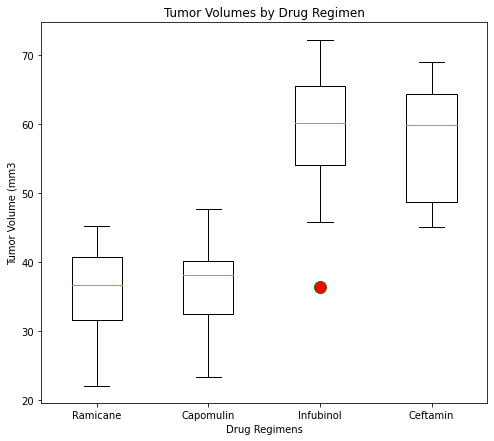

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Isolate four Drug Regimens
ramicane_data = clean_data["Tumor Volume (mm3)"][clean_data["Drug Regimen"] == "Ramicane"]
capomulin_data = clean_data["Tumor Volume (mm3)"][clean_data["Drug Regimen"] == "Capomulin"]
infubinol_data = clean_data["Tumor Volume (mm3)"][clean_data["Drug Regimen"] == "Infubinol"]
ceftamin_data = clean_data["Tumor Volume (mm3)"][clean_data["Drug Regimen"] == "Ceftamin"]

#Convert individual drug dfs to lists
ramicane_tumor_vols = ramicane_data.values.tolist()
capomulin_tumor_vols = capomulin_data.values.tolist()
infubinol_tumor_vols = infubinol_data.values.tolist()
ceftamin_tumor_vols = ceftamin_data.values.tolist()

#Combine the four lists into 1 list for plotting
drug_vol_data = [ramicane_tumor_vols,capomulin_tumor_vols,infubinol_tumor_vols,ceftamin_tumor_vols]
# Create figure
fig = plt.figure(1,figsize=(8,7))
# Set titles and labels
plt.title("Tumor Volumes by Drug Regimen")
plt.ylabel("Tumor Volume (mm3")
plt.xlabel("Drug Regimens")
#Create boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(drug_vol_data,flierprops=flierprops)
plt.xticks([1, 2, 3, 4], ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"])


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

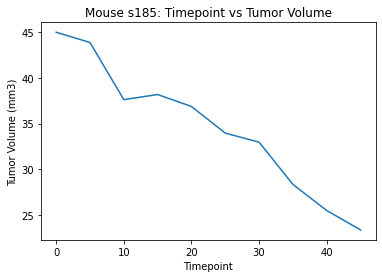

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Isolate mouse data
capomulin_data = clean_data_copy[clean_data_copy["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
#plot data
x_axis = mouse_data["Timepoint"]
y_axis = mouse_data["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
#set titles
plt.title("Mouse s185: Timepoint vs Tumor Volume")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

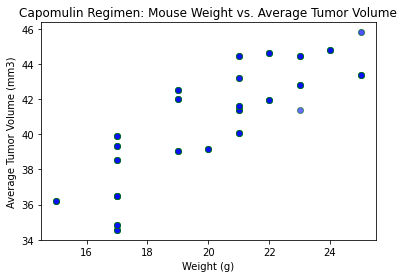

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_tumor_volume = capomulin_data.groupby(["Mouse ID",])["Tumor Volume (mm3)"].mean()
avg_tumor_volume
avg_tumor_volume_df = pd.DataFrame({"Average Tumor Volume (mm3)":avg_tumor_volume}).reset_index(drop=False)                                  
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_data = pd.merge(capomulin_data,avg_tumor_volume_df,on="Mouse ID",how="outer")
capomulin_data
# Set graph axes
x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Average Tumor Volume (mm3)"]
# Create scatter plot
plt.scatter(x=x_axis, y=y_axis, marker="o",facecolors="blue",edgecolor="green",alpha=0.25)
plt.title("Capomulin Regimen: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

r = 0.83
r2 = 0.6889
The p-value is 6.495737656133368e-61
The line of best fit: y = 0.96x + 21.49


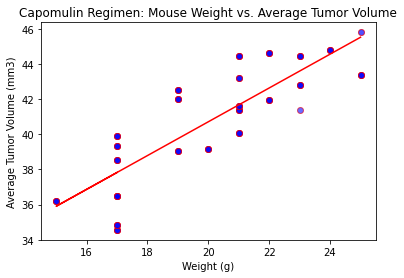

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Average Tumor Volume (mm3)"]
plt.scatter(x=x_axis, y=y_axis, marker="o",facecolors="blue",edgecolor="red",alpha=0.25)
plt.title("Capomulin Regimen: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
# Calculate correlation
correlation = st.pearsonr(x_axis, y_axis)
correlation_coeff = round(correlation[0],2)
print(f"r = {correlation_coeff}")
r_squared = correlation_coeff**2
print(f"r2 = {r_squared}")
print(f"The p-value is {correlation[1]}") 

# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# Calculate the predictions for each value of x (blood pressure)
regress_values = x_axis * slope + intercept
# Create the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The line of best fit: {line_eq}")

# Plot the regression line
plt.plot(x_axis, regress_values, "red")